<a href="https://colab.research.google.com/github/dheerajreddy2020/yolov4-Face-mask-detection/blob/main/Streamlit_model_deployment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -q streamlit

     |████████████████████████████████| 8.2MB 5.5MB/s 
     |████████████████████████████████| 4.6MB 61.1MB/s 
     |████████████████████████████████| 163kB 56.9MB/s 
     |████████████████████████████████| 81kB 10.3MB/s 
     |████████████████████████████████| 112kB 71.7MB/s 
     |████████████████████████████████| 122kB 65.3MB/s 
     |████████████████████████████████| 71kB 9.7MB/s 
ERROR: google-colab 1.0.0 has requirement ipykernel~=4.10, but you'll have ipykernel 5.5.3 which is incompatible.


In [2]:
!pip install -q pyngrok

     |████████████████████████████████| 747kB 4.2MB/s 


In [27]:
import os
!git clone https://github.com/dheerajreddy2020/yolov4-Face-mask-detection
os.chdir('yolov4-Face-mask-detection')

Cloning into 'yolov4-Face-mask-detection'...
remote: Enumerating objects: 8, done.
remote: Counting objects: 100% (8/8), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 14768 (delta 1), reused 6 (delta 1), pack-reused 14760
Receiving objects: 100% (14768/14768), 13.29 MiB | 20.52 MiB/s, done.
Resolving deltas: 100% (10078/10078), done.


In [28]:
# Using gdown download the trained yolo weights file from the google drive
!gdown -O mask_detection.weights https://drive.google.com/uc?id=10zarwJ-riyLK89wVCagKy-N--Tmoy-5X

Downloading...
From: https://drive.google.com/uc?id=10zarwJ-riyLK89wVCagKy-N--Tmoy-5X
To: /content/yolov4-Face-mask-detection/mask_detection.weights
256MB [00:00, 280MB/s]


In [29]:
# Adding the classes file
classes_file = open('data/classes.names','w')
classes_file.write('without_mask\n')
classes_file.write('with_mask\n')
classes_file.write('improper_mask')
classes_file.close()

In [30]:
!/usr/local/cuda/bin/nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2020 NVIDIA Corporation
Built on Wed_Jul_22_19:09:09_PDT_2020
Cuda compilation tools, release 11.0, V11.0.221
Build cuda_11.0_bu.TC445_37.28845127_0


In [31]:
!nvidia-smi

Fri Apr  9 00:39:14 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.67       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   33C    P0    25W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [32]:
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile
!sed -i 's/CUDNN_HALF=0/CUDNN_HALF=1/' Makefile
!sed -i 's/LIBSO=0/LIBSO=1/' Makefile
!make
!chmod +x ./darknet

mkdir -p ./obj/
mkdir -p backup
chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -DCUDNN_HALF -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DOPENCV -DGPU -DCUDNN -I/usr/local/cudnn/include -DCUDNN_HALF -fPIC -c ./src/image_opencv.cpp -o obj/image_opencv.o
./src/image_opencv.cpp: In function ‘void draw_detections_cv_v3(void**, detection*, int, float, char**, image**, int, int)’:
./src/image_opencv.cpp:926:23: warning: variable ‘rgb’ set but not used [-Wunused-but-set-variable]
                 float rgb[3];
                       ^~~
./src/image_opencv.cpp: In function ‘void draw_train_loss(char*, void**, int, float, float, int, int, float, int, char*, float, int, int, double)’:
./src/image_opencv.cpp:1127:13: warning: this ‘if’ clause does not guard... [-Wmisleading-indentation]
             if (iteration_old ==

In [35]:
from google.colab import files
uploaded = files.upload()
for fn in uploaded.keys():
  #path.append(os.getcwd()+'/'+fn)
  !./darknet detect yolov4_custom_test.cfg mask_detection.weights {fn} -dont-show

Saving Demo_image.jpg to Demo_image (1).jpg
 CUDA-version: 11000 (11020), cuDNN: 7.6.5, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 3.2.0
 0 : compute_capability = 600, cudnn_half = 0, GPU: Tesla P100-PCIE-16GB 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     64       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  64 0.354 BF
   3 route  1 		                           ->  208 x 208 x  64 
   4 conv     64       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  64 0.354 BF
   5 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   6 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   7 Shortcut Layer: 4,  wt = 0

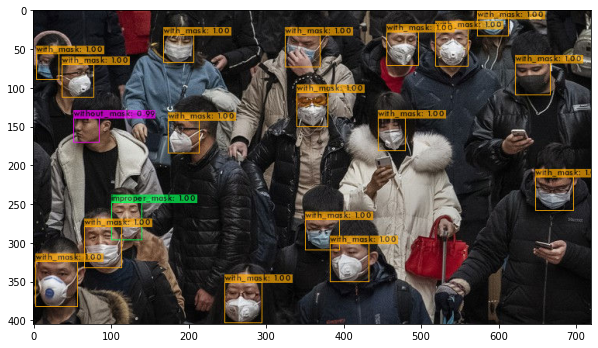

In [36]:
import matplotlib.pyplot as plt 
processed_image = plt.imread("./predictions.jpg")
plt.figure(figsize=(10,15))
plt.imshow(processed_image)

In [37]:
!mkdir tempvideos

### Generate a ngrok token
* Please generate your own token using the website: https://ngrok.com/
* Replace below token with your personal token

In [40]:
!ngrok authtoken 1qrgy9haePPsWWUnWLKM5YwFwxd_5hfpQGNL5RgVGo6YqpoZy

Authtoken saved to configuration file: /root/.ngrok2/ngrok.yml


In [41]:
from pyngrok import ngrok# Open a HTTP tunnel on the default port 80
public_url = ngrok.connect('8501')
public_url

<NgrokTunnel: "http://cf1f0f495ff1.ngrok.io" -> "http://localhost:8501">

In [42]:
!nohup streamlit run webapp.py &

nohup: appending output to 'nohup.out'


In [44]:
ngrok.disconnect(public_url)
ngrok.kill()

In [43]:
# For shutting down the app
#!pgrep streamlit

x = os.popen('pgrep streamlit').read()
for a in x.split('\n'):
  os.system(f'kill {a}')